In [2]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from renommage import *

# Graphique boite à moustache GLOBALE (TOUTES les distances sur TOUT les corpus)

In [ ]:
calcul=["sim2-3","word", "sim2-3-GOLD","sim2-3-ACCMAJ"]
calc=calcul[-1]
liste_cle=["cosinus","jaccard"]
size=[1]

# path_data =f"../ARTICLE_CORPUS/small-*"## 
path_data =f"../CORPUS-COMPAR_TAL-ENS_spacy-stanza"## 
# path_data =f"../ARCHEO_Distances/small-*"## 
for cle in liste_cle:
    for path_corpus in glob.glob(path_data):
        print(path_corpus)
        tableau={}
        liste_version_spacy=[]
        liste_config=[]
        liste_dist=[]
        liste_auteur=[]
        liste_name_metric=[]
        liste_version_ren=[]
        liste_archeo_version_ren=[]
        for path in glob.glob(f"{path_corpus}/*/*VERSIONS/*/NER/SIM/{calc}*.json"):## NER
        # for path in glob.glob(f"{path_corpus}/*/*/*OCR/*/NER/SIM/{calc}*.json"):## ARCHEO NER
        # for path in glob.glob(f"{path_corpus}/*/*OCR/*/SIM/{calc}*.json"):## Texte 

            print(path)
            corpus=path.split("/")[1]##A adapter selon path_data ou path
            # print(corpus)
            autor=path.split("/")[2]##A adapter selon path_data ou path
            autor=autor.split("_")[0]
            # print(autor)
            version=path.split("/")[-1]##A adapter selon path_data ou path
            version=version.split("_")[3]
            print(version)
            nommage_version = nommage(version)## Commenter pour ARCHEOLOGIE DE SPACY
            print(nommage_version)
            vers_ren=path.split("_")[-1].split("-liste.json")[0]
            print(vers_ren)
            distance=lire_fichier(path)
            # print(distance)
        #_______________ARCHEOLOGIE DE SPACY _____________________________________________________
            # archeo_ren=vers_ren.split("-")[1]
            # nommage_version = archeo_nommage(version, vers_ren)
            # print(nommage_version)
        #_______________ARCHEOLOGIE DE SPACY _____________________________________________________

            

            liste_distance=[]
            for key, res_dist in distance.items():
                # print("Key : ",key)
                if key == cle:
                    for res in res_dist:
                        liste_name_metric.append(key)
                        liste_config.append(nommage_version)#+"--"+paire)
                        liste_auteur.append(autor)
                        liste_dist.append(res)
                        liste_version_ren.append(vers_ren)
        #_______________ARCHEOLOGIE DE SPACY _____________________________________________________
                        # liste_archeo_version_ren.append(archeo_ren)
        #_______________ARCHEOLOGIE DE SPACY _____________________________________________________

        tableau["Auteur"]=liste_auteur
        tableau["Configuration"]=liste_config
        tableau[f"Distance {cle}"]=liste_dist
        tableau["Metric"]=liste_name_metric
        tableau["REN"]=liste_version_ren ## Commenter pour OCR
#         # #_______________ARCHEOLOGIE DE SPACY _____________________________________________________
#         tableau["ArcheoREN"]=liste_archeo_version_ren
#         # #_______________ARCHEOLOGIE DE SPACY _____________________________________________________
        data_tab = pd.DataFrame(tableau)
        data_tab=data_tab.sort_values(by = 'Configuration')
        display(data_tab)
# # 
# #         #_____________NER Multi Modèles___________________________
        REN_liste=set(tableau["REN"])
        for r in REN_liste:
            data_tab1=data_tab.query('REN == @r ')
            display(data_tab1)
# #         #_____________NER Multi Modèles___________________________
# 
        # _______________ARCHEOLOGIE DE SPACY ___________________
        # REN_liste=set(tableau["ArcheoREN"])
        # for r in REN_liste:
        #     data_tab1=data_tab.query('ArcheoREN == @r ')
        #     display(data_tab1)
        # _______________ARCHEOLOGIE DE SPACY ___________________
#______ Partie à indenter pour NER Multi Modèles et ARCHEOLOGIE DE SPACY
            for x in size:
                sns.set_theme(style="ticks")

                # Initialize the figure with a logarithmic x axis
                # f, ax = plt.subplots(figsize=(15,32))
                f, ax = plt.subplots(figsize=(15,15))
                ax.set_xscale("linear")


                # Plot the orbital period with horizontal boxes
                sns.boxplot(x=f"Distance {cle}",  y="Configuration", data=data_tab1,
                        whis=[0, 1], width=.6, palette="coolwarm")#, legend=False)# data_tab1 POUR  NER Multi Modèles ET ARCHEOLOGIE DE SPACY

                # Add in points to show each observation
                sns.stripplot(x=f"Distance {cle}", y="Configuration", data=data_tab1,
                          size=4, palette='dark:.3', linewidth=0)#, legend=False)# data_tab1 POUR  NER Multi Modèles ET ARCHEOLOGIE DE SPACY

                # Tweak the visual presentation
                plt.tick_params(axis = 'both', labelsize = 25)
                ax.xaxis.grid(True)
                ax.set(ylabel="")
                plt.xlim([0,x])

            # sns.despine(trim=True, left=True)
#______ Partie à indenter pour NER Multi Modèles et ARCHEOLOGIE DE SPACY
# ####___________________GLOBALE________________________________________           
#             # plt.savefig(f"../CORRECTION_DISTANCES/Boite-a_moustache/OCR/{corpus}_{cle}-{calc}_size-{x}.png",dpi=300, bbox_inches="tight")##Texte
#                 plt.savefig(f"../Boite-a_moustache/GLOBALE/{corpus}/{corpus}_{r}_{cle}-{calc}_size-{x}.png",dpi=300, bbox_inches="tight")##NER Multi
#                 plt.close()
#             #     plt.savefig(f"../ARCHEO_Distances/Boite-a_moustache/GLOBALE/{corpus}_spaCy/{corpus}_spaCy-{r}_{cle}-{calc}_size-{x}.png",dpi=300, bbox_inches="tight")##NER Archéo
# # # ####___________________GLOBALE________________________________________       


# Graphique boite à moustache PAR AUTEUR 

REF
Ref. -- spacy-lg-3.7.5
REF
Ref. -- spacy-md-3.7.5
REF
Ref. -- spacy-sm-3.7.5
REF
Ref. -- stanza-fr-1.8.2
REF
Ref. -- camembert-4.41.1
REF
Ref. -- flair-0.13.1


,Auteur,Configuration,Distance,Metric,REN
0,DAUDET_VERSIONS,REF -- spacy-lg-3.7.5,0.674566,jaccard,spacy-lg-3.7.5
1,DAUDET_VERSIONS,REF -- spacy-lg-3.7.5,0.506566,cosinus,spacy-lg-3.7.5
2,DAUDET_VERSIONS,REF -- spacy-md-3.7.5,0.699225,jaccard,spacy-md-3.7.5
3,DAUDET_VERSIONS,REF -- spacy-md-3.7.5,0.416027,cosinus,spacy-md-3.7.5
4,DAUDET_VERSIONS,REF -- spacy-sm-3.7.5,0.721440,jaccard,spacy-sm-3.7.5
5,DAUDET_VERSIONS,REF -- spacy-sm-3.7.5,0.526475,cosinus,spacy-sm-3.7.5
6,DAUDET_VERSIONS,REF -- stanza-fr-1.8.2,0.704508,jaccard,stanza-fr-1.8.2
7,DAUDET_VERSIONS,REF -- stanza-fr-1.8.2,0.345419,cosinus,stanza-fr-1.8.2
8,DAUDET_VERSIONS,REF -- camembert-4.41.1,0.730835,jaccard,camembert-4.41.1
9,DAUDET_VERSIONS,REF -- camembert-4.41.1,0.431133,cosinus,camembert-4.41.1


,Auteur,Configuration,Distance,Metric,REN
0,DAUDET_VERSIONS,REF -- spacy-lg-3.7.5,0.674566,jaccard,spacy-lg-3.7.5
1,DAUDET_VERSIONS,REF -- spacy-lg-3.7.5,0.506566,cosinus,spacy-lg-3.7.5
6,DAUDET_VERSIONS,REF -- stanza-fr-1.8.2,0.704508,jaccard,stanza-fr-1.8.2
7,DAUDET_VERSIONS,REF -- stanza-fr-1.8.2,0.345419,cosinus,stanza-fr-1.8.2
8,DAUDET_VERSIONS,REF -- camembert-4.41.1,0.730835,jaccard,camembert-4.41.1
9,DAUDET_VERSIONS,REF -- camembert-4.41.1,0.431133,cosinus,camembert-4.41.1
10,DAUDET_VERSIONS,REF -- flair-0.13.1,0.837246,jaccard,flair-0.13.1
11,DAUDET_VERSIONS,REF -- flair-0.13.1,0.484816,cosinus,flair-0.13.1


REF
Ref. -- spacy-lg-3.7.5
REF
Ref. -- spacy-md-3.7.5
REF
Ref. -- spacy-sm-3.7.5
REF
Ref. -- stanza-fr-1.8.2
REF
Ref. -- camembert-4.41.1
REF
Ref. -- flair-0.13.1


,Auteur,Configuration,Distance,Metric,REN
0,CARRAUD_VERSIONS,REF -- spacy-lg-3.7.5,0.810127,jaccard,spacy-lg-3.7.5
1,CARRAUD_VERSIONS,REF -- spacy-lg-3.7.5,0.882790,cosinus,spacy-lg-3.7.5
2,CARRAUD_VERSIONS,REF -- spacy-md-3.7.5,0.799505,jaccard,spacy-md-3.7.5
3,CARRAUD_VERSIONS,REF -- spacy-md-3.7.5,0.868707,cosinus,spacy-md-3.7.5
4,CARRAUD_VERSIONS,REF -- spacy-sm-3.7.5,0.817982,jaccard,spacy-sm-3.7.5
5,CARRAUD_VERSIONS,REF -- spacy-sm-3.7.5,0.741903,cosinus,spacy-sm-3.7.5
6,CARRAUD_VERSIONS,REF -- stanza-fr-1.8.2,0.926702,jaccard,stanza-fr-1.8.2
7,CARRAUD_VERSIONS,REF -- stanza-fr-1.8.2,0.645687,cosinus,stanza-fr-1.8.2
8,CARRAUD_VERSIONS,REF -- camembert-4.41.1,0.904372,jaccard,camembert-4.41.1
9,CARRAUD_VERSIONS,REF -- camembert-4.41.1,0.753733,cosinus,camembert-4.41.1


,Auteur,Configuration,Distance,Metric,REN
0,CARRAUD_VERSIONS,REF -- spacy-lg-3.7.5,0.810127,jaccard,spacy-lg-3.7.5
1,CARRAUD_VERSIONS,REF -- spacy-lg-3.7.5,0.882790,cosinus,spacy-lg-3.7.5
6,CARRAUD_VERSIONS,REF -- stanza-fr-1.8.2,0.926702,jaccard,stanza-fr-1.8.2
7,CARRAUD_VERSIONS,REF -- stanza-fr-1.8.2,0.645687,cosinus,stanza-fr-1.8.2
8,CARRAUD_VERSIONS,REF -- camembert-4.41.1,0.904372,jaccard,camembert-4.41.1
9,CARRAUD_VERSIONS,REF -- camembert-4.41.1,0.753733,cosinus,camembert-4.41.1
10,CARRAUD_VERSIONS,REF -- flair-0.13.1,0.830769,jaccard,flair-0.13.1
11,CARRAUD_VERSIONS,REF -- flair-0.13.1,0.716104,cosinus,flair-0.13.1


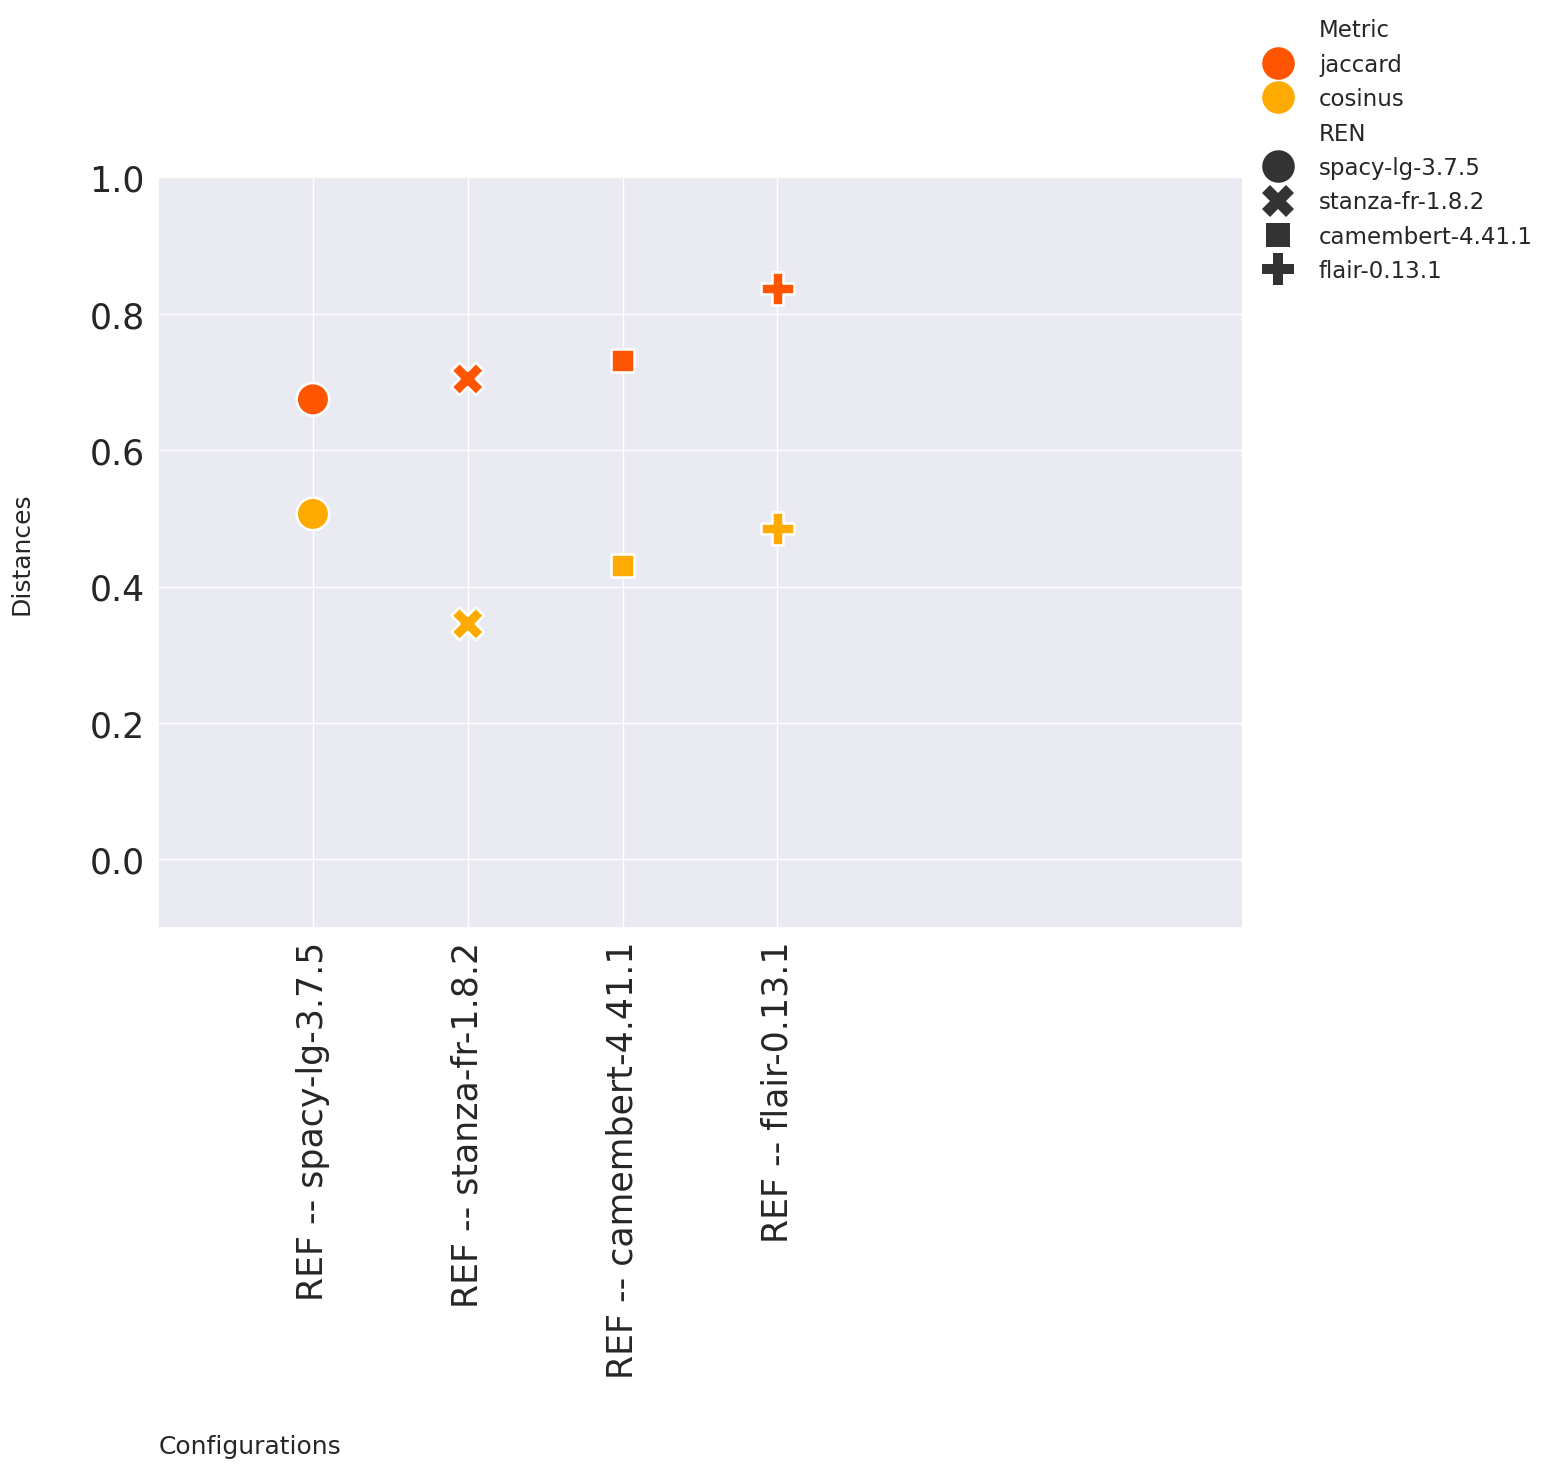

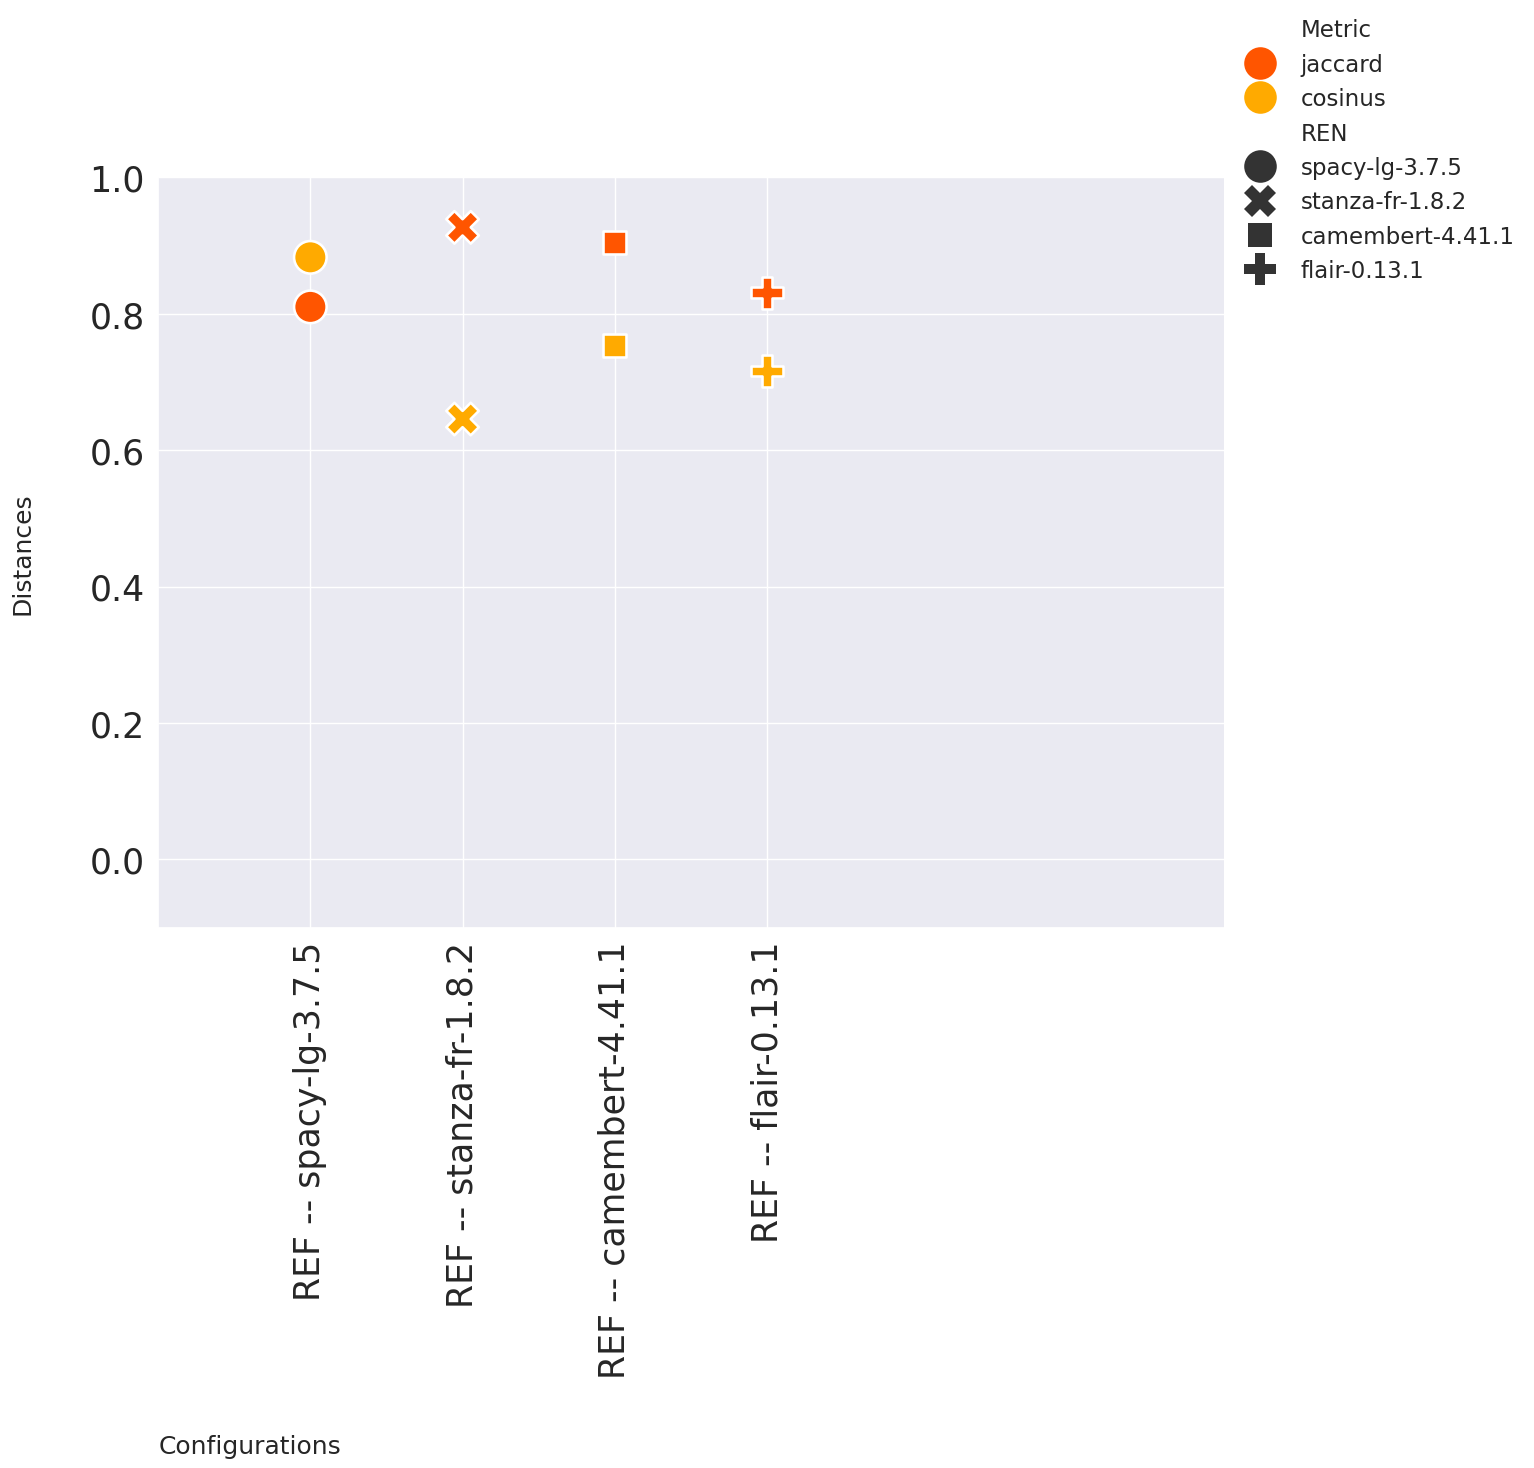

In [19]:
calcul=["sim2-3","word", "sim2-3-GOLD","sim2-3-ACCMAJ"]
calc=calcul[-2]

# path_data =f"../ARCHEO_Distances/small-*fra"## 
# path_data =f"../CORRECTION_DISTANCES/small-*/*"## 
path_data =f"../CORPUS-COMPAR_TAL-ENS2_spacy-stanza/*"## 
for path_corpus in glob.glob(path_data):
    # print(path_corpus)
    tableau={}
    liste_version_spacy=[]
    liste_config=[]
    liste_dist=[]
    liste_auteur=[]
    liste_name_metric=[]
    liste_version_ren=[]
    liste_archeo_version_ren=[]

    # for path in glob.glob(f"{path_corpus}/*/*/*OCR/*/NER/SIM/{calc}*.json"):## ARCHEO NER PAR_AUTEUR
    for path in glob.glob(f"{path_corpus}/*VERSIONS/*/NER/SIM/{calc}*.json"):## NER PAR_AUTEUR
    # for path in glob.glob(f"{path_corpus}/*OCR/*/SIM/{calc}*.json"):## Texte PAR_AUTEUR
    #     print(path)
        corpus=path.split("/")[1]##A adapter selon path
        # print(corpus)
        autor=path.split("/")[3]##A adapter selon ARCHEO NER PAR_AUTEUR
        # autor=autor.split("_")[0]
        # print(autor)
        version=path.split("/")[4]##A adapter selon path_data ou path
        version=version.split("_")[-1]
        print(version)
        vers_ren=path.split("_")[-1].split("-liste.json")[0]
        # print(vers_ren)
        distance=lire_fichier(path)
        # print(distance)
    # #_______________ARCHEOLOGIE DE SPACY _____________________________________________________
        archeo_ren=vers_ren.split("-")[1]
        nommage_version = archeo_nommage(version, vers_ren)
        print(nommage_version)
    # #_______________ARCHEOLOGIE DE SPACY _____________________________________________________

        nommage_version = nommage(version)## Commenter pour ARCHEOLOGIE DE SPACY

        # liste_distance=[]
        for key, res_dist in distance.items():
            # print("Key : ",key)
            if key == "cosinus" or key == "jaccard":
                for res in res_dist:
                    liste_name_metric.append(key)
                    liste_config.append(nommage_version+" -- "+vers_ren)#+"--"+paire)
                    liste_auteur.append(autor)
                    liste_dist.append(res)
                    liste_version_ren.append(vers_ren)
    # #_______________ARCHEOLOGIE DE SPACY _____________________________________________________
                    liste_archeo_version_ren.append(archeo_ren)
    # #_______________ARCHEOLOGIE DE SPACY _____________________________________________________

    tableau["Auteur"]=liste_auteur
    tableau["Configuration"]=liste_config
    tableau[f"Distance"]=liste_dist
    tableau["Metric"]=liste_name_metric
    tableau["REN"]=liste_version_ren ## Commenter pour OCR
    # #_______________ARCHEOLOGIE DE SPACY _____________________________________________________
    # tableau["ArcheoREN"]=liste_archeo_version_ren
    # #_______________ARCHEOLOGIE DE SPACY _____________________________________________________
    data_tab = pd.DataFrame(tableau)
    # data_tab=data_tab.sort_values(by = ['Configuration',"Metric","ArcheoREN"])
    display(data_tab)

    # _____________NER graph global Multi Modèles___________________________
    x=len(set(tableau["Configuration"]))
    valeur=['spacy-md-3.7.5','spacy-sm-3.7.5']
    data_tab1=data_tab.query("REN not in @valeur" )
    display(data_tab1)
    # 1/0
   # _____________NER graph global Multi Modèles___________________________

    # ## _____________NER Multi Modèles___________________________
    # x=len(set(tableau["Configuration"]))
    # REN_liste=set(tableau["REN"])
    # for r in REN_liste:
    #     data_tab1=data_tab.query('REN == @r ')
    #     display(data_tab1)
    # # 
    # ## _____________NER Multi Modèles___________________________

    ## _______________ARCHEOLOGIE DE SPACY ___________________

    # REN_liste=set(tableau["ArcheoREN"])
    # Autor_liste=set(tableau["Auteur"])
    # print(Autor_liste)
    # for r in REN_liste:
    #     data_tab0=data_tab.query('ArcheoREN == @r')
    #     # display(data_tab0)
    #     for aut in Autor_liste:
    #         # print(aut)
    #         data_tab1=data_tab0.query('Auteur == @aut')
    #         x=len(set(data_tab1["Configuration"]))
    #         # print(set(data_tab1["Configuration"]))
    #         # print("x------------>",x)
    #         print(aut)
    #         # display(data_tab1)
    ## _______________ARCHEOLOGIE DE SPACY ___________________

# #______ Partie à indenter pour NER Multi Modèles et ARCHEOLOGIE DE SPACY
    x=len(set(tableau["REN"]))
    sns.set_theme(style="darkgrid") 
    sns.set(font_scale=1.5)
    ## _____________NER graph 1 Modèle___________________________
    # p=sns.relplot(data=data_tab1, x="Configuration", y="Distance", hue="Metric", style="Metric", palette="autumn",s=800, height=8.7, aspect=11.7/8.27)
    # sns.move_legend(p, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False,)
    ## _____________NER graph 1 Modèle___________________________

   # _____________NER graph global Multi Modèles___________________________
    p=sns.relplot(data=data_tab1, x="Configuration", y="Distance", hue="Metric", style="REN", palette="autumn",s=550,  height=8.7, aspect=11.7/8.27)
   #  p=sns.relplot(data=data_tab1, x="REN", y="Distance", hue="Metric", style="REN", palette="autumn",s=550,  height=8.7, aspect=11.7/8.27)
    sns.move_legend(p, "center right", bbox_to_anchor=(1, 1), ncol=1, title=None, frameon=False,)
    # _____________NER graph global Multi Modèles___________________________

    plt.tick_params(axis = 'both',grid_color='w', labelsize = 25)
    plt.xticks(rotation=90)
    plt.ylim([-0.1,1])
    plt.xlim([-1,x])
    plt.xlabel("Configurations",labelpad=40,loc="left")
    plt.ylabel("Distances",labelpad=40)
    # plt.savefig(f"../CORRECTION_DISTANCES/Boite-a_moustache/PAR_AUTEUR/{corpus}_MultiNER/{autor}_{corpus}-{calc}.png",dpi=300, bbox_inches="tight")##NER Multi
    # plt.savefig(f"../CORRECTION_DISTANCES/Boite-a_moustache/PAR_AUTEUR/{corpus}/{autor}_{corpus}-{r}-{calc}.png",dpi=300, bbox_inches="tight")##NER 
    # plt.savefig(f"../ARCHEO_Distances/Boite-a_moustache/PAR_AUTEUR/{corpus}_spaCy/{aut}_{corpus}_spaCy-{r}_{calc}.png",dpi=300, bbox_inches="tight")##NER Archéo
    # plt.savefig(f"../Boite-a_moustache/PAR_AUTEUR/{corpus}/{aut}_{corpus}_spaCy-{r}_{calc}.png",dpi=300, bbox_inches="tight")##NER Multi
    # plt.close()
   #  


# # #______ Partie à indenter pour NER Multi Modèles et ARCHEOLOGIE DE SPACY
# #      
# # ####___________________PAR_AUTEUR________________________________________           
#     plt.savefig(f"../Boite-a_moustache/PAR_AUTEUR/OCR/{corpus}/{autor}_{corpus}_{calc}.png",dpi=300, bbox_inches="tight")##Texte
    plt.savefig(f"../Boite-a_moustache/PAR_AUTEUR/{corpus}/{autor}_{corpus}_{r}-{calc}.png",dpi=300, bbox_inches="tight")##NER 
# #             plt.savefig(f"../ARCHEO_Correction_Distances/Boite-a_moustache/PAR_AUTEUR/{corpus}_spaCy/{aut}_{corpus}_spaCy-{r}_{calc}.png",dpi=300, bbox_inches="tight")##NER Archéo
# # ####___________________PAR_AUTEUR________________________________________   

In [1]:
# !python --version